In [36]:
from helper import euclidean_distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import random

def range_query_linear_search(dataset: pd.DataFrame, target_id: int, r: float):
    """
    Finds all POIs within r distance to a target POI using linear search.

    Parameters:
        dataset (pd.DataFrame): A DataFrame containing POI data with columns '@id', '@lat', '@lon', and 'name'.
        target_id (int): The ID of the target POI.
        r (float): The distance within which to find the POIs.

    Returns:
        list: A list of the '@id' and '@dist' of the k-nearest neighbors.
    """

    POI = dataset.loc[dataset['@id'] == target_id].iloc[0]

    dataset['@dist'] = dataset.apply(lambda row: euclidean_distance(row, POI), axis=1)

    result = dataset.loc[(dataset['@dist'] > 0) and (dataset['@dist'] <= r)][['@id', '@dist']].values.tolist()

    return result


In [38]:
df = pd.read_csv('../dataset/clean_nyc_dataset.csv')
range_query_linear_search(df, 666, 0.05)

[[42421728.0, 0.04665876336348396],
 [42421731.0, 0.04612665374000293],
 [42421737.0, 0.04564899796675911],
 [42421741.0, 0.0448265602706678],
 [42421745.0, 0.04429844538784346],
 [42421749.0, 0.044190382381804554],
 [42421769.0, 0.025180272878983712],
 [42421772.0, 0.024264002060662516],
 [42421775.0, 0.023873551191642473],
 [42421776.0, 0.023710685770767202],
 [42421800.0, 0.029499991479652734],
 [42421803.0, 0.02830544721144114],
 [42421806.0, 0.027401837242412987],
 [42421809.0, 0.027014607883140647],
 [42421810.0, 0.026832251030797664],
 [42421820.0, 0.026593537199849023],
 [42421882.0, 0.03098265882521974],
 [42421889.0, 0.031028500387386724],
 [42421969.0, 0.012336352867842008],
 [42421972.0, 0.011487991631694379],
 [42421974.0, 0.010463401359978166],
 [42421982.0, 0.009221889195277862],
 [42421985.0, 0.008909189795373107],
 [42421993.0, 0.033440505839470794],
 [42421996.0, 0.03229965395247219],
 [42422000.0, 0.03142592892150871],
 [42422006.0, 0.031071908760321166],
 [42422016.

In [27]:
df = pd.read_csv('../dataset/clean_nyc_dataset.csv')

k_list = [1, 5, 10, 50, 100, 500]
N_list = [1000, 10000, 100000, 825171]

plot_data = calculate_execution_time(N_list, k_list, df)

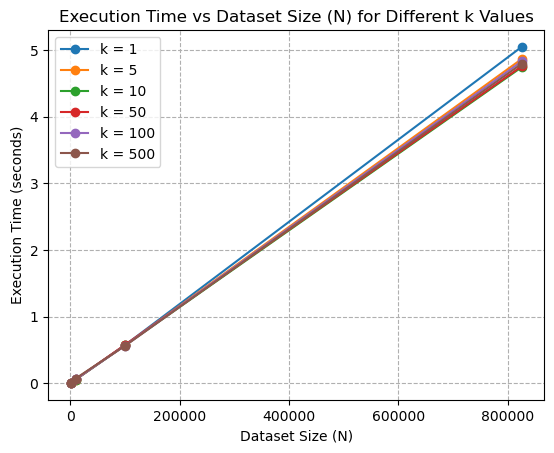

In [29]:
for k, exec_time in plot_data.items():
    plt.plot(N_list, exec_time, label=f'k = {k}', marker='o')

plt.title('Execution Time vs Dataset Size (N) for Different k Values')
plt.xlabel('Dataset Size (N)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()